In [22]:
import matplotlib.pyplot as plt, numpy as np, numpy.random as npr, pystan as ps, matplotlib.pyplot as plt
import scipy, seaborn as sbn, pandas as pd
%matplotlib inline
from time import time
from pylab import plot, show, legend

In [2]:
theta_0 = [4, 2, 1]
theta_0 /= scipy.linalg.norm(theta_0);

n = 100;
X = npr.multivariate_normal(theta_0, 10*np.eye(3), n);

mu = [1, 1, 1];
mu /= scipy.linalg.norm(mu);

m = len(theta_0)

In [3]:
sm = ps.StanModel(file="t.stan")

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_c1d7978ed701900b4c2cd00f2dfdbe8d NOW.


In [4]:
data = dict(m=m, XBar=np.mean(X,0), mu=mu)
theta = np.zeros(m)
def initfun(): return dict(theta=theta)

In [7]:
start = time()
fit = sm.sampling(data=data, chains=10, n_jobs=10, iter=2_000, init="random")
print(round((time()-start)/60,2), "minutes to run")

0.0 minutes to run


In [15]:
trace = fit.extract()
theta_unconstr = trace['theta']
theta_proj = np.zeros(np.shape(theta_unconstr))
for i in range(np.shape(theta_unconstr)[0]) :
    theta_proj[i] = theta_unconstr[i]/np.linalg.norm(theta_unconstr[i])

In [16]:
scipy.linalg.norm(np.mean(theta_proj,0)-theta_0)

0.3273982608065102

In [18]:
np.linalg.norm(theta_proj-theta_0)

47.33050177860798

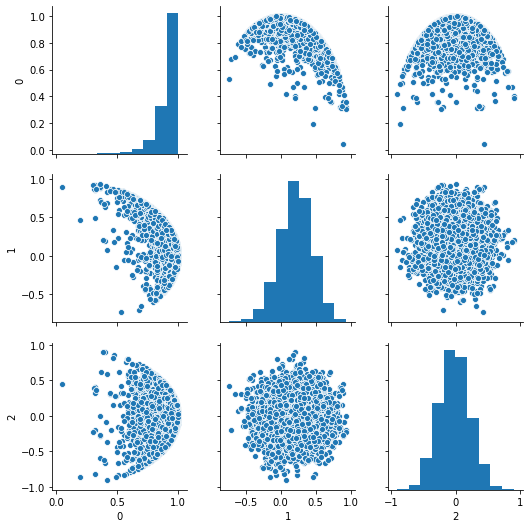

In [23]:
sbn.pairplot(pd.DataFrame(data=theta_proj))